# Clustering 

In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('CustomerData.csv')

In [9]:
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
df.dropna(how='any', inplace=True)
df.drop('CUST_ID', axis=1,inplace=True)

In [13]:
df.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [15]:
df.shape

(8636, 17)

In [ ]:
# 17 Coloumn diagram

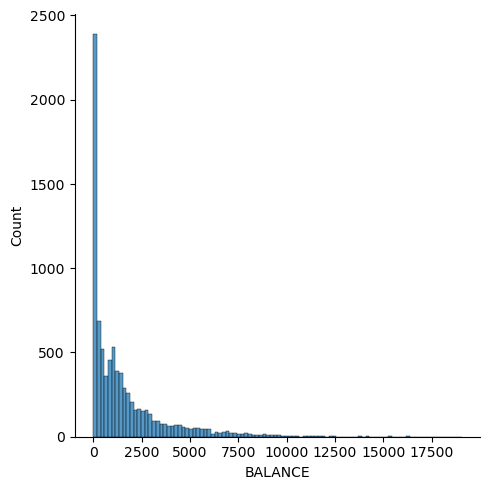

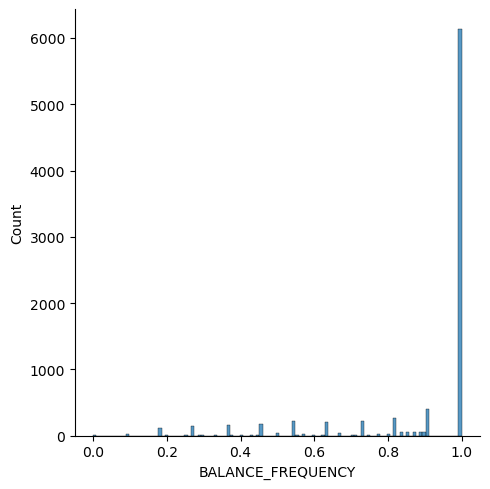

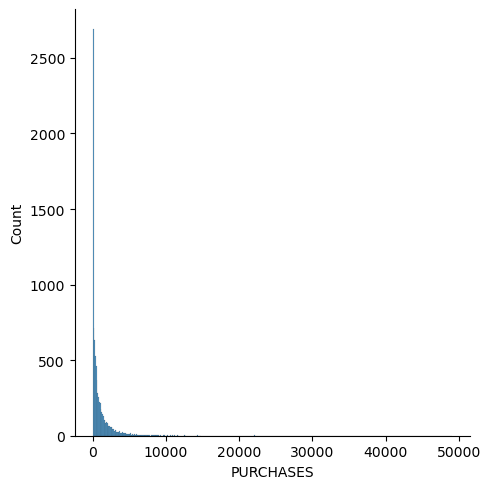

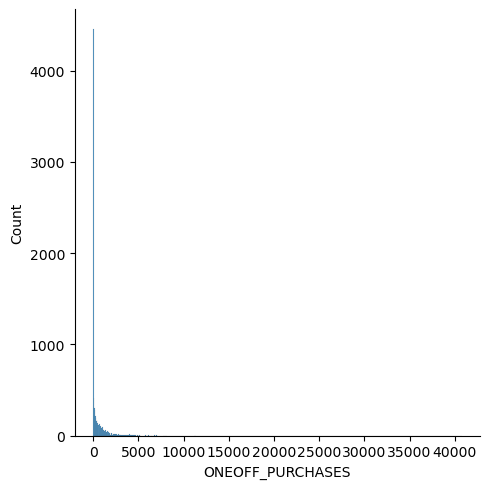

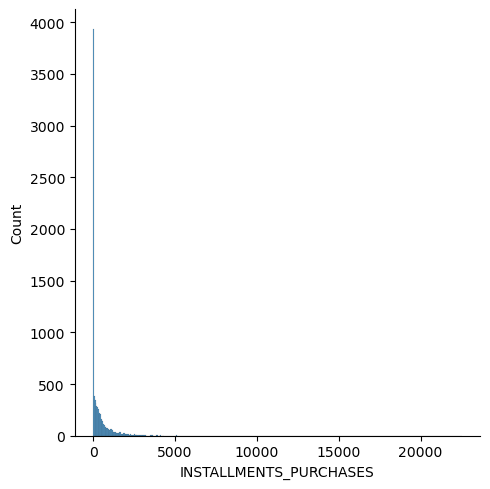

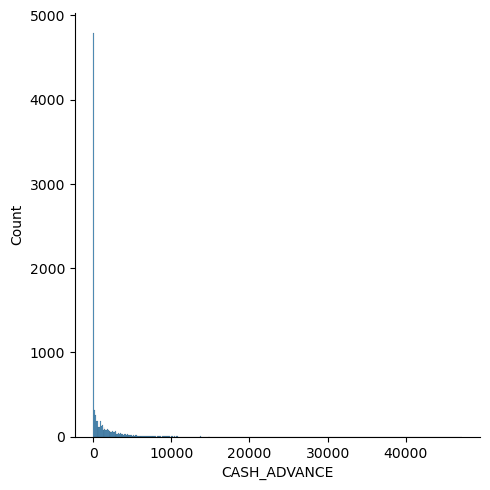

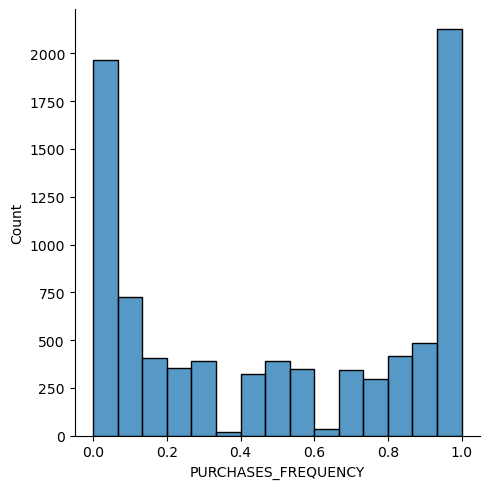

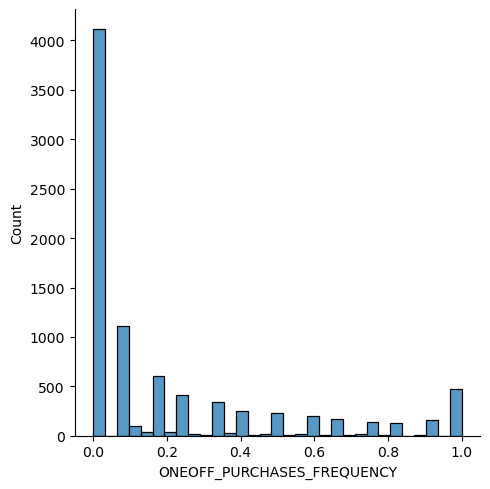

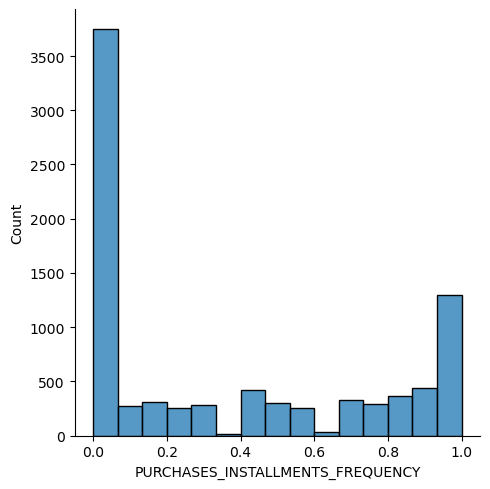

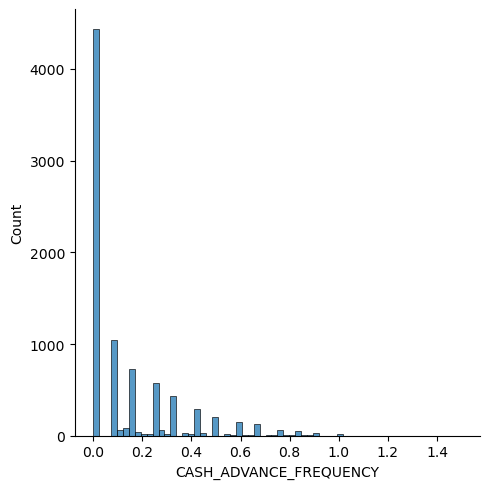

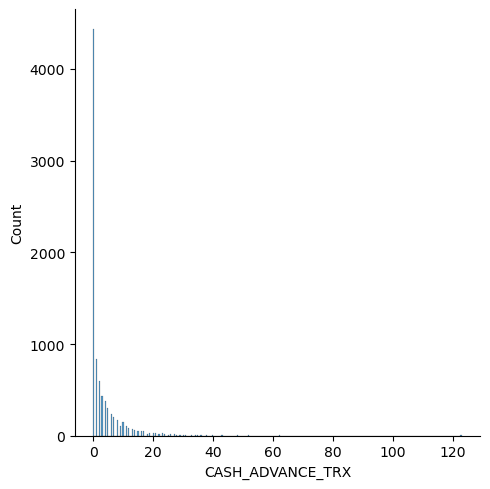

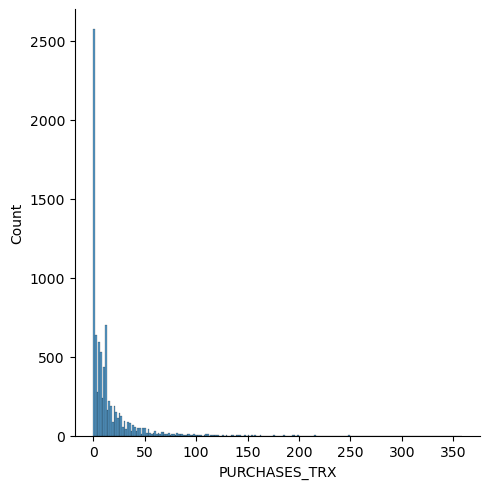

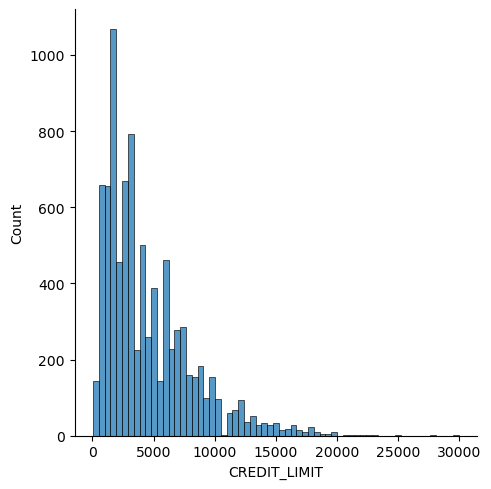

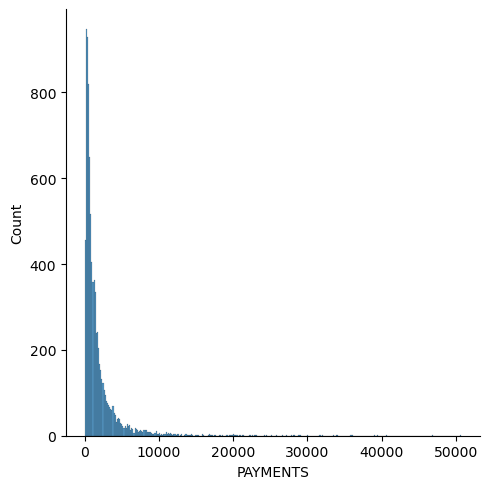

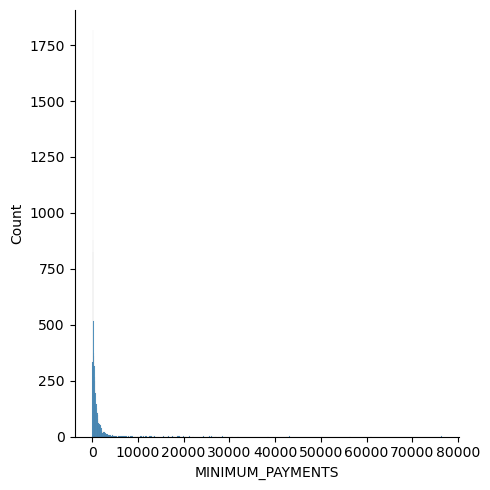

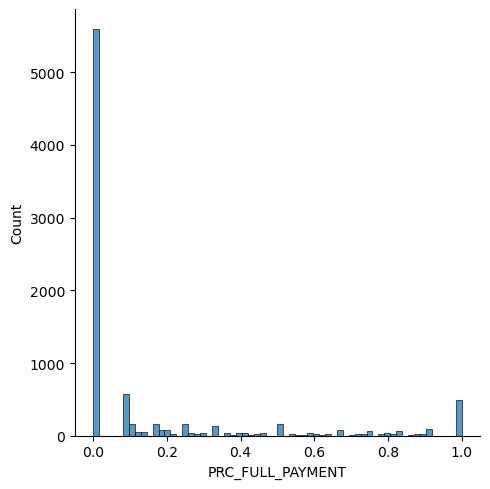

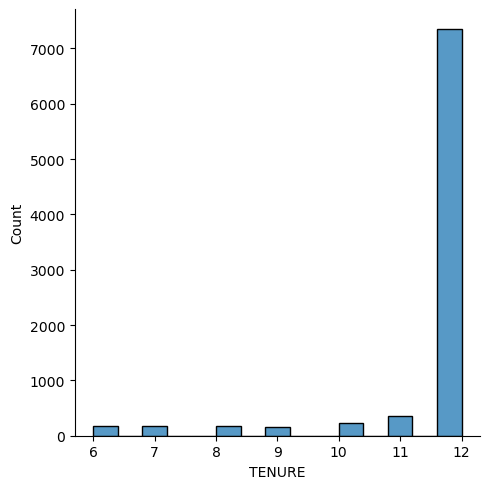

In [31]:
for num in range(0,17):
    #ax = plt.subplot()
    col = df.columns[num]
    sns.displot(df[col])


Text(0.5, 1.0, 'Heat Map')

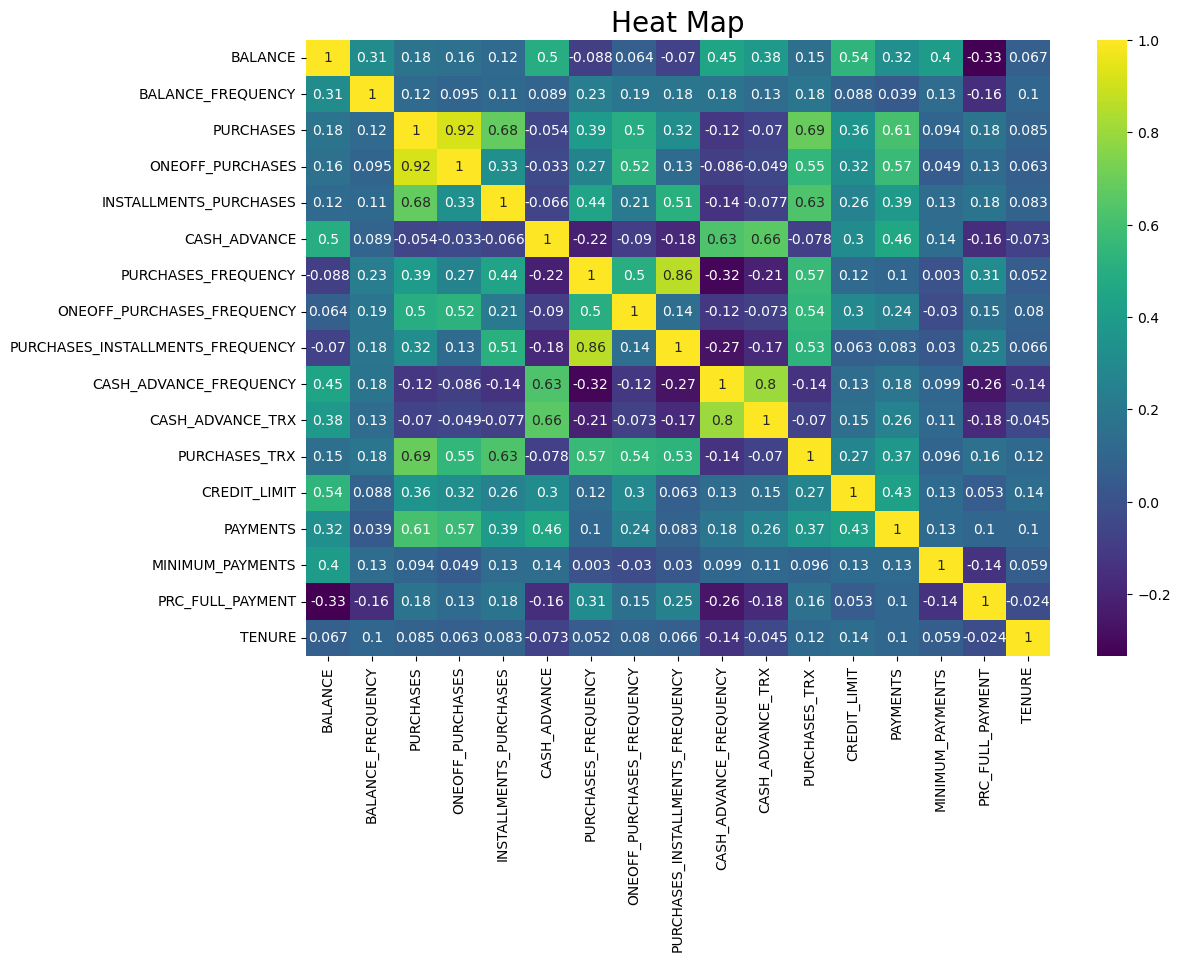

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.title('Heat Map', fontsize=20)

# Clustering part 

# Website Clustering

In [47]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_df=sc.fit_transform(df)

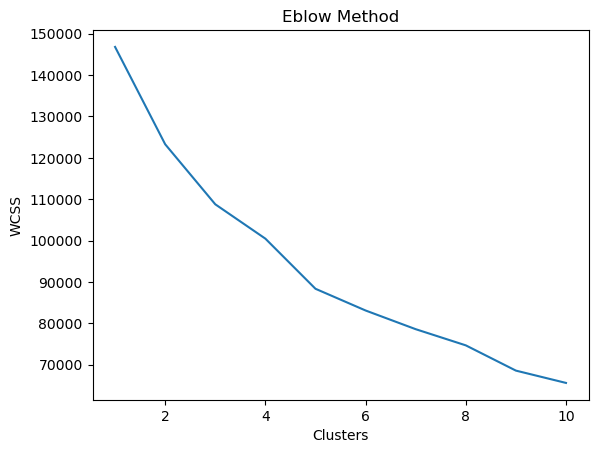

In [53]:
#Elblow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(sc_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Eblow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()   

In [77]:
kmeans = KMeans(n_clusters=5,init='k-means++')
y_kmeans = kmeans.fit_predict(sc_df)

In [79]:
X= sc_df

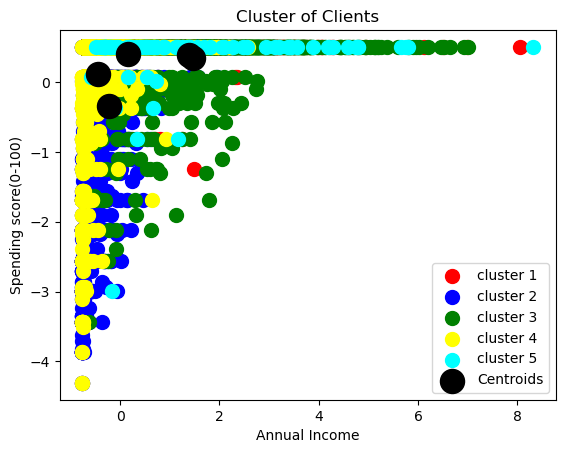

In [73]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans ==0,1],  s = 100, c="red", label = "cluster 1")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans ==1,1],  s = 100, c="blue", label = "cluster 2")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans ==2,1],  s = 100, c="green", label = "cluster 3")
plt.scatter(X[y_kmeans==3,0],X[y_kmeans ==3,1],  s = 100, c="yellow", label = "cluster 4")
plt.scatter(X[y_kmeans==4,0],X[y_kmeans ==4,1],  s = 100, c="cyan", label = "cluster 5")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1] ,s = 300, c="black", label = "Centroids")


plt.title("Cluster of Clients")
plt.xlabel("Annual Income")
plt.ylabel("Spending score(0-100)")
plt.legend()
plt.show()